# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [10]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores
print

# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207459e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [12]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [26]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

b2 max relative error: 4.447646e-11
W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


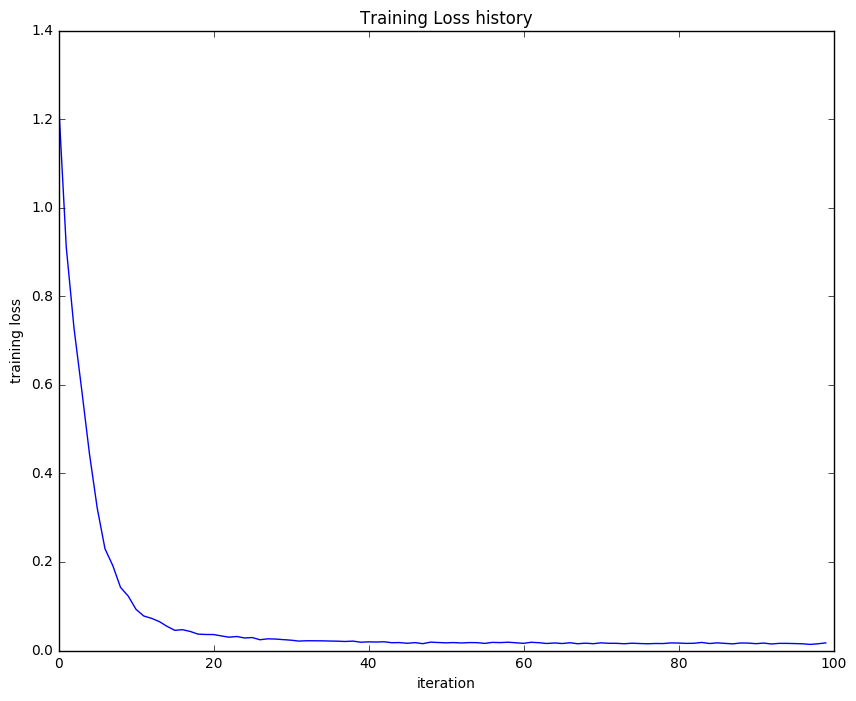

In [28]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print 'Final training loss: ', stats['loss_history'][-1]

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [29]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [30]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc

iteration 0 / 1000: loss 2.302954


iteration 100 / 1000: loss 2.302550


iteration 200 / 1000: loss 2.297648


iteration 300 / 1000: loss 2.259602


iteration 400 / 1000: loss 2.204170


iteration 500 / 1000: loss 2.118565


iteration 600 / 1000: loss 2.051535


iteration 700 / 1000: loss 1.988466


iteration 800 / 1000: loss 2.006591


iteration 900 / 1000: loss 1.951473


Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

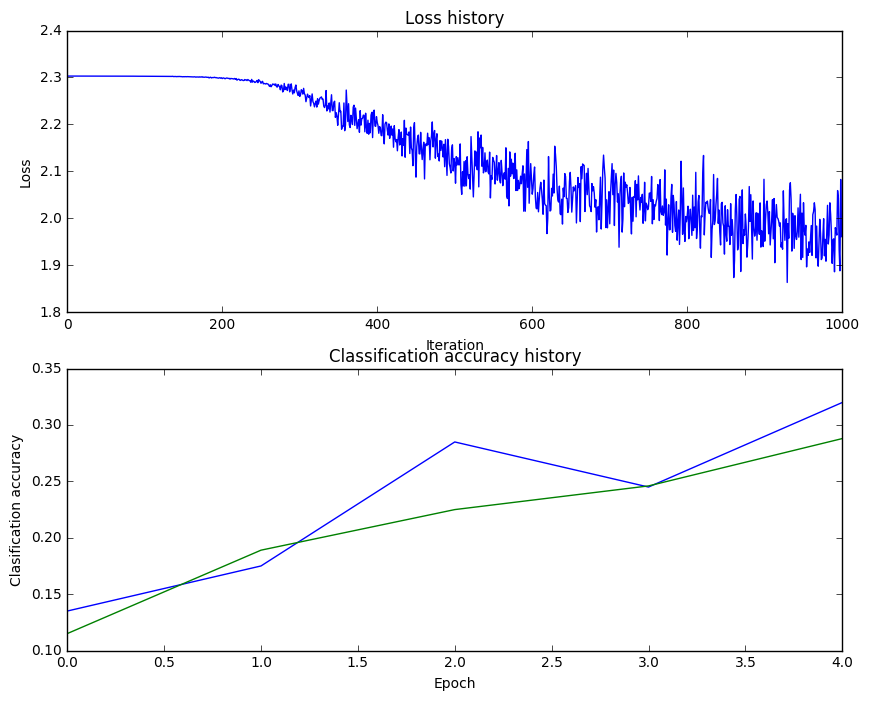

In [31]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

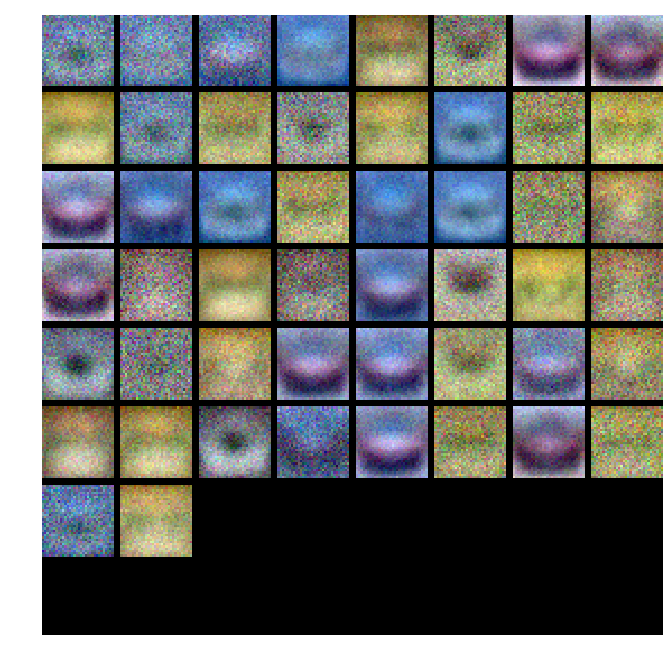

In [32]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [38]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

input_size = 32 * 32 * 3
num_classes = 10
best_val = -1

learning_rates = [4e-4]
regularization_strengths = [5e-2, 8e-2, 1e-1]
hidden_sizes = [140, 150, 160]
for lr in learning_rates:
    for reg in regularization_strengths:
        for hs in hidden_sizes:
            net_temp = TwoLayerNet(input_size, hs, num_classes)
            net_temp.train(X_train, y_train, X_val, y_val, num_iters=2000, batch_size=200, learning_rate=lr, learning_rate_decay=0.95, reg=reg, verbose=True)
            train_acc = (net_temp.predict(X_train) == y_train).mean()
            val_acc = (net_temp.predict(X_val) == y_val).mean()
            print 'lr %e reg %e hs %e train accuracy: %f val accuracy: %f' % (lr, reg, hs, train_acc, val_acc)
            if best_val < val_acc:
                best_val = val_acc
                best_net = net_temp
                
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 2000: loss 2.302705


iteration 100 / 2000: loss 2.148798


iteration 200 / 2000: loss 1.955470


iteration 300 / 2000: loss 1.781937


iteration 400 / 2000: loss 1.727386


iteration 500 / 2000: loss 1.672588


iteration 600 / 2000: loss 1.675542


iteration 700 / 2000: loss 1.718423


iteration 800 / 2000: loss 1.556214


iteration 900 / 2000: loss 1.606179


iteration 1000 / 2000: loss 1.573892


iteration 1100 / 2000: loss 1.728766


iteration 1200 / 2000: loss 1.593754


iteration 1300 / 2000: loss 1.459128


iteration 1400 / 2000: loss 1.532924


iteration 1500 / 2000: loss 1.550697


iteration 1600 / 2000: loss 1.420732


iteration 1700 / 2000: loss 1.477833


iteration 1800 / 2000: loss 1.502049


iteration 1900 / 2000: loss 1.365003


lr 4.000000e-04 reg 5.000000e-02 hs 1.400000e+02 train accuracy: 0.500265 val accuracy: 0.486000
iteration 0 / 2000: loss 2.302725


iteration 100 / 2000: loss 2.154823


iteration 200 / 2000: loss 1.970794


iteration 300 / 2000: loss 1.883351


iteration 400 / 2000: loss 1.695219


iteration 500 / 2000: loss 1.710017


iteration 600 / 2000: loss 1.643859


iteration 700 / 2000: loss 1.717929


iteration 800 / 2000: loss 1.555140


iteration 900 / 2000: loss 1.537995


iteration 1000 / 2000: loss 1.594990


iteration 1100 / 2000: loss 1.590741


iteration 1200 / 2000: loss 1.593030


iteration 1300 / 2000: loss 1.571815


iteration 1400 / 2000: loss 1.607084


iteration 1500 / 2000: loss 1.630426


iteration 1600 / 2000: loss 1.468633


iteration 1700 / 2000: loss 1.458216


iteration 1800 / 2000: loss 1.441574


iteration 1900 / 2000: loss 1.361480


lr 4.000000e-04 reg 5.000000e-02 hs 1.500000e+02 train accuracy: 0.501673 val accuracy: 0.479000
iteration 0 / 2000: loss 2.302752


iteration 100 / 2000: loss 2.137276


iteration 200 / 2000: loss 1.953293


iteration 300 / 2000: loss 1.841076


iteration 400 / 2000: loss 1.695704


iteration 500 / 2000: loss 1.594023


iteration 600 / 2000: loss 1.773396


iteration 700 / 2000: loss 1.681030


iteration 800 / 2000: loss 1.526429


iteration 900 / 2000: loss 1.555950


iteration 1000 / 2000: loss 1.566607


iteration 1100 / 2000: loss 1.621271


iteration 1200 / 2000: loss 1.610047


iteration 1300 / 2000: loss 1.534327


iteration 1400 / 2000: loss 1.618878


iteration 1500 / 2000: loss 1.384615


iteration 1600 / 2000: loss 1.464777


iteration 1700 / 2000: loss 1.537435


iteration 1800 / 2000: loss 1.381725


iteration 1900 / 2000: loss 1.481391


lr 4.000000e-04 reg 5.000000e-02 hs 1.600000e+02 train accuracy: 0.501449 val accuracy: 0.471000
iteration 0 / 2000: loss 2.302720


iteration 100 / 2000: loss 2.167901


iteration 200 / 2000: loss 1.942128


iteration 300 / 2000: loss 1.912250


iteration 400 / 2000: loss 1.678743


iteration 500 / 2000: loss 1.873589


iteration 600 / 2000: loss 1.689550


iteration 700 / 2000: loss 1.635814


iteration 800 / 2000: loss 1.646792


iteration 900 / 2000: loss 1.759021


iteration 1000 / 2000: loss 1.578355


iteration 1100 / 2000: loss 1.488088


iteration 1200 / 2000: loss 1.523955


iteration 1300 / 2000: loss 1.558414


iteration 1400 / 2000: loss 1.615079


iteration 1500 / 2000: loss 1.461874


iteration 1600 / 2000: loss 1.468453


iteration 1700 / 2000: loss 1.405857


iteration 1800 / 2000: loss 1.497416


iteration 1900 / 2000: loss 1.447368


lr 4.000000e-04 reg 8.000000e-02 hs 1.400000e+02 train accuracy: 0.500714 val accuracy: 0.477000
iteration 0 / 2000: loss 2.302789


iteration 100 / 2000: loss 2.186402


iteration 200 / 2000: loss 1.898431


iteration 300 / 2000: loss 1.695183


iteration 400 / 2000: loss 1.791256


iteration 500 / 2000: loss 1.743749


iteration 600 / 2000: loss 1.792776


iteration 700 / 2000: loss 1.712181


iteration 800 / 2000: loss 1.585834


iteration 900 / 2000: loss 1.614590


iteration 1000 / 2000: loss 1.722076


iteration 1100 / 2000: loss 1.591122


iteration 1200 / 2000: loss 1.656186


iteration 1300 / 2000: loss 1.458166


iteration 1400 / 2000: loss 1.671543


iteration 1500 / 2000: loss 1.548004


iteration 1600 / 2000: loss 1.422138


iteration 1700 / 2000: loss 1.508099


iteration 1800 / 2000: loss 1.498226


iteration 1900 / 2000: loss 1.488787


lr 4.000000e-04 reg 8.000000e-02 hs 1.500000e+02 train accuracy: 0.501612 val accuracy: 0.484000
iteration 0 / 2000: loss 2.302765


iteration 100 / 2000: loss 2.121022


iteration 200 / 2000: loss 1.970176


iteration 300 / 2000: loss 1.845745


iteration 400 / 2000: loss 1.761749


iteration 500 / 2000: loss 1.667255


iteration 600 / 2000: loss 1.727457


iteration 700 / 2000: loss 1.719125


iteration 800 / 2000: loss 1.652545


iteration 900 / 2000: loss 1.708067


iteration 1000 / 2000: loss 1.650646


iteration 1100 / 2000: loss 1.518144


iteration 1200 / 2000: loss 1.612574


iteration 1300 / 2000: loss 1.501591


iteration 1400 / 2000: loss 1.486717


iteration 1500 / 2000: loss 1.472709


iteration 1600 / 2000: loss 1.458441


iteration 1700 / 2000: loss 1.384084


iteration 1800 / 2000: loss 1.488159


iteration 1900 / 2000: loss 1.493274


lr 4.000000e-04 reg 8.000000e-02 hs 1.600000e+02 train accuracy: 0.503367 val accuracy: 0.482000
iteration 0 / 2000: loss 2.302759


iteration 100 / 2000: loss 2.107495


iteration 200 / 2000: loss 1.945835


iteration 300 / 2000: loss 1.770385


iteration 400 / 2000: loss 1.767651


iteration 500 / 2000: loss 1.772697


iteration 600 / 2000: loss 1.635243


iteration 700 / 2000: loss 1.725347


iteration 800 / 2000: loss 1.639409


iteration 900 / 2000: loss 1.506237


iteration 1000 / 2000: loss 1.645257


iteration 1100 / 2000: loss 1.529279


iteration 1200 / 2000: loss 1.498495


iteration 1300 / 2000: loss 1.537464


iteration 1400 / 2000: loss 1.468314


iteration 1500 / 2000: loss 1.474514


iteration 1600 / 2000: loss 1.500256


iteration 1700 / 2000: loss 1.435758


iteration 1800 / 2000: loss 1.481463


iteration 1900 / 2000: loss 1.400150


lr 4.000000e-04 reg 1.000000e-01 hs 1.400000e+02 train accuracy: 0.500020 val accuracy: 0.479000
iteration 0 / 2000: loss 2.302793


iteration 100 / 2000: loss 2.177190


iteration 200 / 2000: loss 1.978756


iteration 300 / 2000: loss 1.916723


iteration 400 / 2000: loss 1.839415


iteration 500 / 2000: loss 1.793536


iteration 600 / 2000: loss 1.665374


iteration 700 / 2000: loss 1.573047


iteration 800 / 2000: loss 1.588673


iteration 900 / 2000: loss 1.626944


iteration 1000 / 2000: loss 1.626375


iteration 1100 / 2000: loss 1.628431


iteration 1200 / 2000: loss 1.562482


iteration 1300 / 2000: loss 1.470018


iteration 1400 / 2000: loss 1.424901


iteration 1500 / 2000: loss 1.533910


iteration 1600 / 2000: loss 1.419668


iteration 1700 / 2000: loss 1.456364


iteration 1800 / 2000: loss 1.486276


iteration 1900 / 2000: loss 1.446395


lr 4.000000e-04 reg 1.000000e-01 hs 1.500000e+02 train accuracy: 0.501224 val accuracy: 0.478000
iteration 0 / 2000: loss 2.302792


iteration 100 / 2000: loss 2.191680


iteration 200 / 2000: loss 1.967666


iteration 300 / 2000: loss 1.736219


iteration 400 / 2000: loss 1.865534


iteration 500 / 2000: loss 1.745424


iteration 600 / 2000: loss 1.670618


iteration 700 / 2000: loss 1.669737


iteration 800 / 2000: loss 1.615871


iteration 900 / 2000: loss 1.547132


iteration 1000 / 2000: loss 1.565719


iteration 1100 / 2000: loss 1.524009


iteration 1200 / 2000: loss 1.420621


iteration 1300 / 2000: loss 1.526063


iteration 1400 / 2000: loss 1.488034


iteration 1500 / 2000: loss 1.567821


iteration 1600 / 2000: loss 1.553938


iteration 1700 / 2000: loss 1.570681


iteration 1800 / 2000: loss 1.511400


iteration 1900 / 2000: loss 1.484527


lr 4.000000e-04 reg 1.000000e-01 hs 1.600000e+02 train accuracy: 0.502653 val accuracy: 0.470000


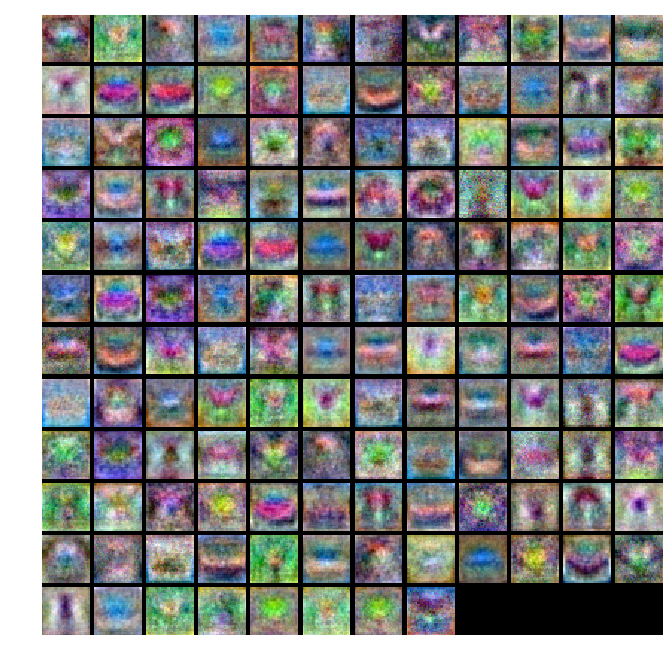

In [39]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [41]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.481
